Dataset ini adala dataset toko roti yang berlokasi Edinburgh. Yerdiri dari  20507 data, lebih 9000 transactions, and 4 kolom.

In [236]:
library(arules)
library(arulesViz)
library(dplyr)
library(plyr)

In [237]:
data = read.csv("../input/the-bread-basket/bread basket.csv")
head(data,10)

,Transaction,Item,date_time,period_day,weekday_weekend
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,Bread,30-10-2016 09:58,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,2,Scandinavian,30-10-2016 10:05,morning,weekend
4,3,Hot chocolate,30-10-2016 10:07,morning,weekend
5,3,Jam,30-10-2016 10:07,morning,weekend
6,3,Cookies,30-10-2016 10:07,morning,weekend
7,4,Muffin,30-10-2016 10:08,morning,weekend
8,5,Coffee,30-10-2016 10:13,morning,weekend
9,5,Pastry,30-10-2016 10:13,morning,weekend


In [238]:
sum(is.na(data))

[1] 0

In [239]:
str(data)

'data.frame':	20507 obs. of  5 variables:
 $ Transaction    : int  1 2 2 3 3 3 4 5 5 5 ...
 $ Item           : chr  "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...
 $ date_time      : chr  "30-10-2016 09:58" "30-10-2016 10:05" "30-10-2016 10:05" "30-10-2016 10:07" ...
 $ period_day     : chr  "morning" "morning" "morning" "morning" ...
 $ weekday_weekend: chr  "weekend" "weekend" "weekend" "weekend" ...


In [240]:
sorted <- data[order(data$Transaction),]
sorted$Transaction <- as.numeric(sorted$Transaction)
str(sorted)

'data.frame':	20507 obs. of  5 variables:
 $ Transaction    : num  1 2 2 3 3 3 4 5 5 5 ...
 $ Item           : chr  "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...
 $ date_time      : chr  "30-10-2016 09:58" "30-10-2016 10:05" "30-10-2016 10:05" "30-10-2016 10:07" ...
 $ period_day     : chr  "morning" "morning" "morning" "morning" ...
 $ weekday_weekend: chr  "weekend" "weekend" "weekend" "weekend" ...


In [241]:
itemList <- ddply(sorted, c("Transaction","date_time"), 
                  function(df1)
                      paste(df1$Item, collapse = ","))

In [242]:
itemList$Transaction <- NULL
itemList$date_time <- NULL
itemList$period_day <- NULL
itemList$weekday_weekend <- NULL

In [243]:
colnames (itemList) <- c("itemList")

In [244]:
write.csv(itemList, "itemList.csv", quote=FALSE, row.names=TRUE)
head(itemList, 10)

,itemList
,<chr>
1,Bread
2,"Scandinavian,Scandinavian"
3,"Hot chocolate,Jam,Cookies"
4,Muffin
5,"Coffee,Pastry,Bread"
6,"Medialuna,Pastry,Muffin"
7,"Medialuna,Pastry,Coffee,Tea"
8,"Pastry,Bread"
9,"Bread,Muffin"


In [245]:
str(itemList)

'data.frame':	9465 obs. of  1 variable:
 $ itemList: chr  "Bread" "Scandinavian,Scandinavian" "Hot chocolate,Jam,Cookies" "Muffin" ...


In [246]:
transaksi = read.transactions("./itemList.csv", format="basket",sep=",",cols=1)

Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
“EOF within quoted string”
Warning message in 

In [247]:
transaksi

transactions in sparse format with
 9466 transactions (rows) and
 105 items (columns)

In [248]:
basket_rules = apriori(transaksi, parameter = list(sup=0.01, minlen=3, conf=0.1, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 94 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[105 item(s), 9466 transaction(s)] done [0.00s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [249]:
print(length(basket_rules))

[1] 9


In [250]:
summary(basket_rules)

set of 9 rules

rule length distribution (lhs + rhs):sizes
3 
9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support          confidence        coverage            lift       
 Min.   :0.01004   Min.   :0.1115   Min.   :0.02335   Min.   :0.5611  
 1st Qu.:0.01004   1st Qu.:0.1834   1st Qu.:0.02916   1st Qu.:0.8032  
 Median :0.01004   Median :0.2013   Median :0.04986   Median :0.8990  
 Mean   :0.01042   Mean   :0.2529   Mean   :0.05145   Mean   :1.0683  
 3rd Qu.:0.01120   3rd Qu.:0.3841   3rd Qu.:0.05472   3rd Qu.:1.2869  
 Max.   :0.01120   Max.   :0.4299   Max.   :0.09001   Max.   :1.9382  
     count       
 Min.   : 95.00  
 1st Qu.: 95.00  
 Median : 95.00  
 Mean   : 98.67  
 3rd Qu.:106.00  
 Max.   :106.00  

mining info:
      data ntransactions support confidence
 transaksi          9466    0.01        0.1

In [251]:
inspect(basket_rules)

    lhs                rhs      support    confidence coverage   lift     
[1] {Bread,Pastry}  => {Coffee} 0.01119797 0.3840580  0.02915698 0.8032463
[2] {Coffee,Pastry} => {Bread}  0.01119797 0.2360802  0.04743292 0.7222802
[3] {Bread,Coffee}  => {Pastry} 0.01119797 0.1244131  0.09000634 1.4467996
[4] {Cake,Tea}      => {Coffee} 0.01003592 0.4222222  0.02376928 0.8830657
[5] {Cake,Coffee}   => {Tea}    0.01003592 0.1833977  0.05472216 1.2869107
[6] {Coffee,Tea}    => {Cake}   0.01003592 0.2012712  0.04986267 1.9381821
[7] {Bread,Cake}    => {Coffee} 0.01003592 0.4298643  0.02334671 0.8990488
[8] {Cake,Coffee}   => {Bread}  0.01003592 0.1833977  0.05472216 0.5610997
[9] {Bread,Coffee}  => {Cake}   0.01003592 0.1115023  0.09000634 1.0737347
    count
[1] 106  
[2] 106  
[3] 106  
[4]  95  
[5]  95  
[6]  95  
[7]  95  
[8]  95  
[9]  95  


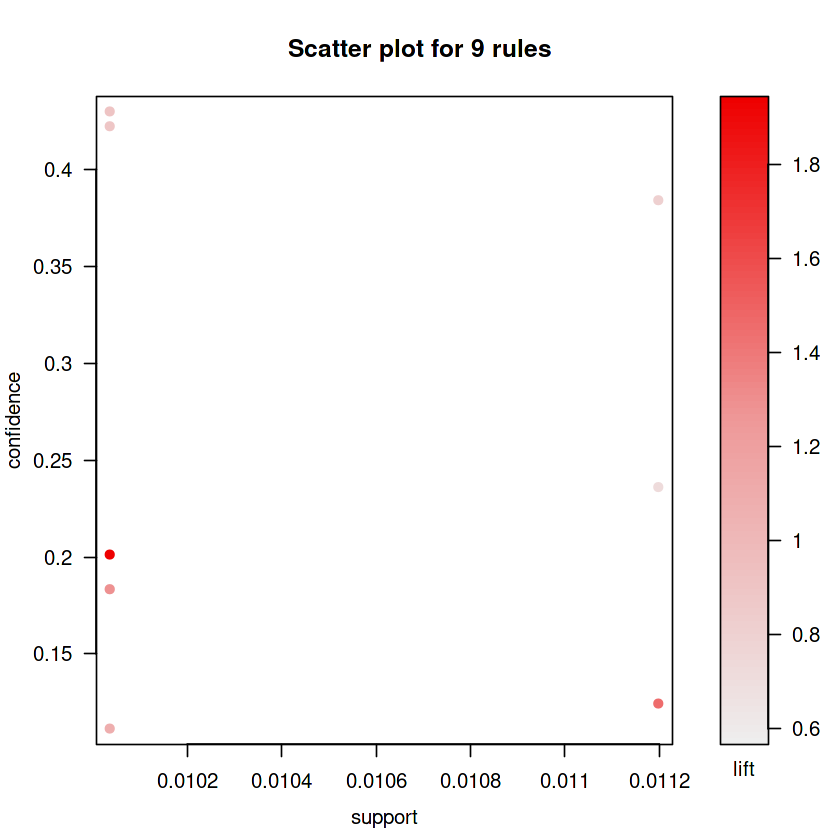

In [252]:
plot(basket_rules, jitter=0)

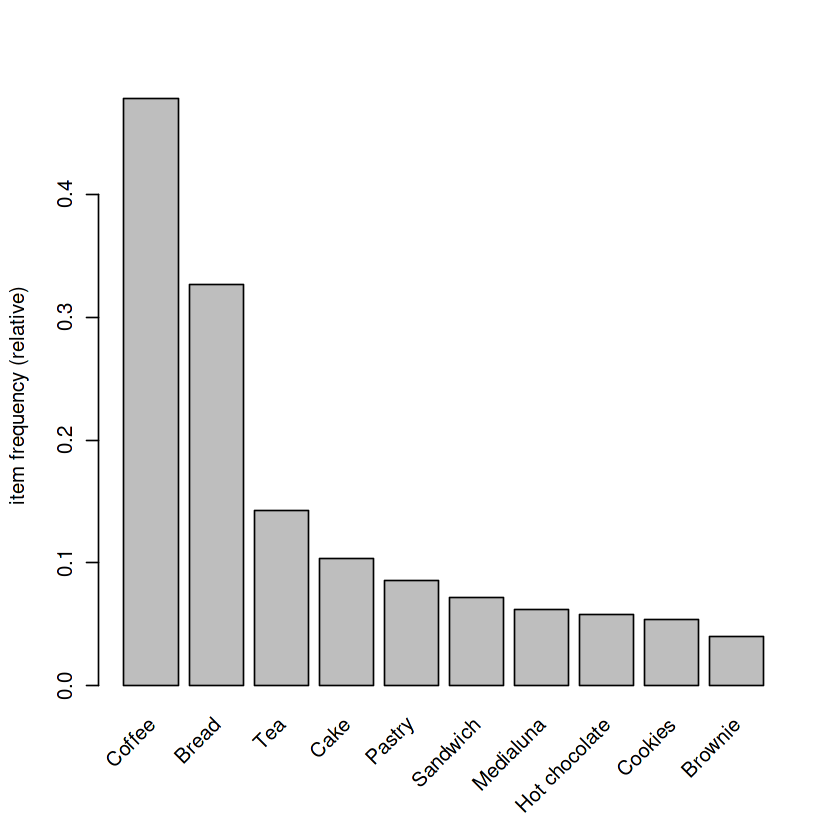

In [253]:
itemFrequencyPlot(transaksi, topN=10)

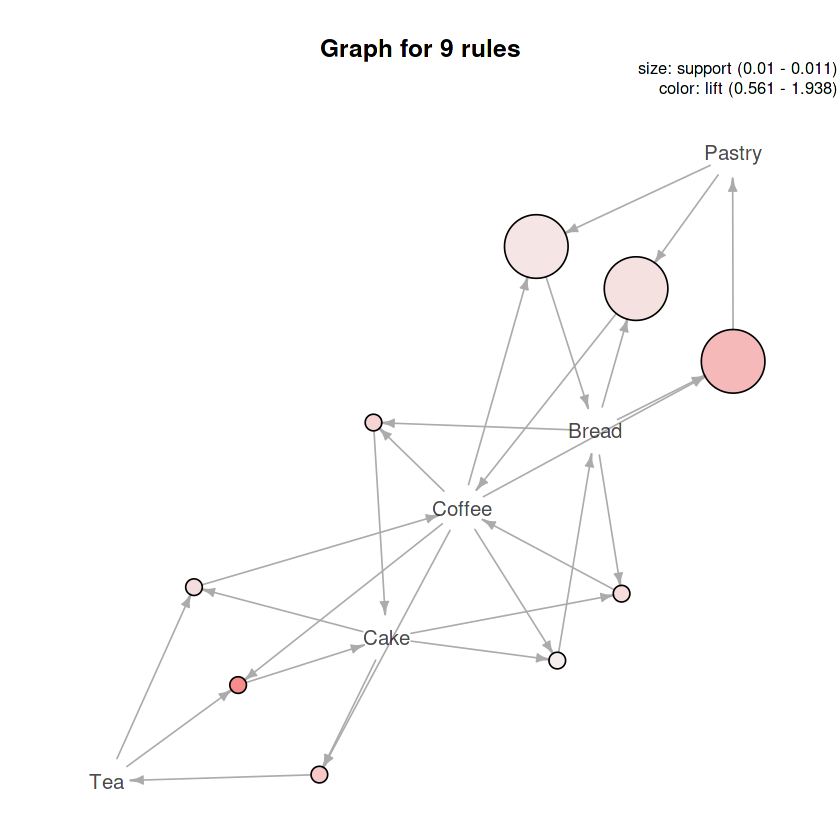

In [254]:
plot(basket_rules, method="graph")

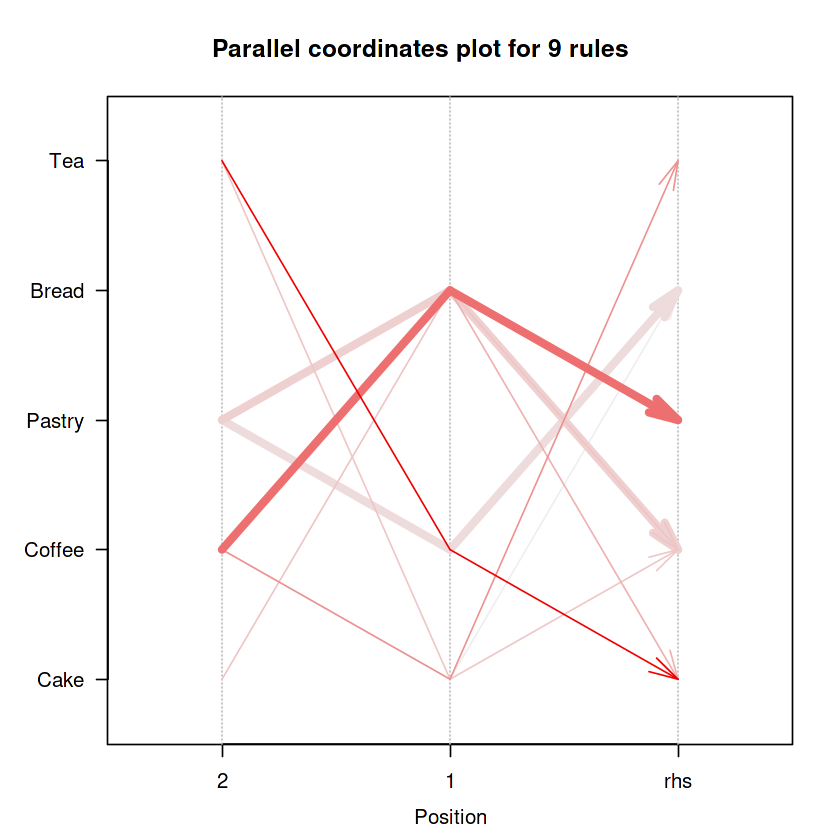

In [255]:
plot(basket_rules, method="paracoord")